# Introduction
We have used google play store app data of around 10k apps for analysing using python.

You can find raw data and results here https://www.kaggle.com/lava18/google-play-store-apps.

In [1]:
!pip install jovian numpy pandas seaborn matplotlib  --upgrade --quiet

In [2]:
import jovian

In [3]:
project_name="play store analysis"

In [4]:
jovian.commit(project="play store analysis",Environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib

In [6]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/jasonchang0/kaggle-google-apps/master/google-play-store-apps/googleplaystore.csv","googleplaystore.csv")

('googleplaystore.csv', <http.client.HTTPMessage at 0x7f7ed49b9ad0>)

In [7]:
play_store_df=pd.read_csv("googleplaystore.csv")

In [8]:
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


###### DELETE UNCESSARY COLUMNS WHICH WE WILL  NOT USE IN OUR ANALYSIS.

## Save and upload your work

In [9]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

# Data preparation and cleaning

##### DELETE UNCESSARY COLUMNS WHICH WE WILL NOT USE IN OUR ANALYSIS.

In [10]:
play_store_df.drop(columns=["Last Updated","Current Ver","Android Ver","Genres","Price"],inplace=True)  ##remove unusefull requirements

##### COUNT AND DELETE DUPLICATES APPS 

In [11]:
duplicates_app=play_store_df.duplicated(subset=["App"]).sum()  
print("there are  {} no .of duplicates apps in play store out of {} apps".format(duplicates_app,play_store_df.shape[0]))

there are  1181 no .of duplicates apps in play store out of 10841 apps


In [12]:
play_store_df.drop_duplicates(subset="App", keep="first", inplace=True)
print("no. of rows remaining after deleting {} duplicates are {}. ".format(duplicates_app,play_store_df.shape[0]))



no. of rows remaining after deleting 1181 duplicates are 9660. 


In [13]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Content Rating       1
dtype: int64

###### Delete all null and unnecessary values

In [14]:
# Check and clean type values
print(set(play_store_df.Type))

{nan, 'Free', 'Paid', '0'}


In [15]:
play_store_df.dropna(subset=["Rating","Type"],inplace=True)

In [16]:
play_store_df.drop(play_store_df.index[play_store_df.Type=="0"],axis=0)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+


In [17]:
play_store_df.isnull().sum() ##now all nan etc  type of values have been deleted

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    1
dtype: int64

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

In [19]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8197 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8197 non-null   object 
 1   Category        8197 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         8197 non-null   object 
 4   Size            8197 non-null   object 
 5   Installs        8197 non-null   object 
 6   Type            8197 non-null   object 
 7   Content Rating  8196 non-null   object 
dtypes: float64(1), object(7)
memory usage: 896.4+ KB


In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

In [21]:
play_store_df["Category"].value_counts()

FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         298
MEDICAL                 290
PHOTOGRAPHY             263
BUSINESS                263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
1.9                       1
Name: Category, dtype: int64

In [22]:
play_store_df.drop(play_store_df.index[play_store_df.Category=="1.9"],inplace=True); ##remove this 1.9 type of category.

 # Data analysis and visualization

### 1..APPS DISTRIBUTION ON BASIS OF ITS TYPES

In [23]:
type_apps=play_store_df.Type.value_counts()

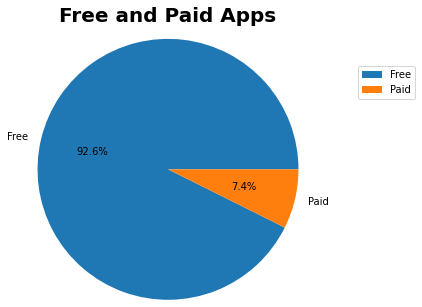

In [24]:
plt.pie(type_apps.values,labels=type_apps.index,autopct='%1.1f%%',radius=1.5);
plt.legend(type_apps.index,bbox_to_anchor=(1.35, 1),ncol=1)
plt.title('Free and Paid Apps',y=1.15,fontsize=20,weight='bold');

### ILLUSTRATION.....

 ###### IT IS CLEARLY VISIVIBLE FROM CHART MORE THAN 90% APPS ON PLAY STORE ARE FREE AND REST OF THEM ARE PAID.

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

 ### 2..DISTRIBUTION OF APPS ON BASIS OF CATEGORY

In [26]:
categories=pd.Series(play_store_df.Category.str.split(",").sum()).value_counts()

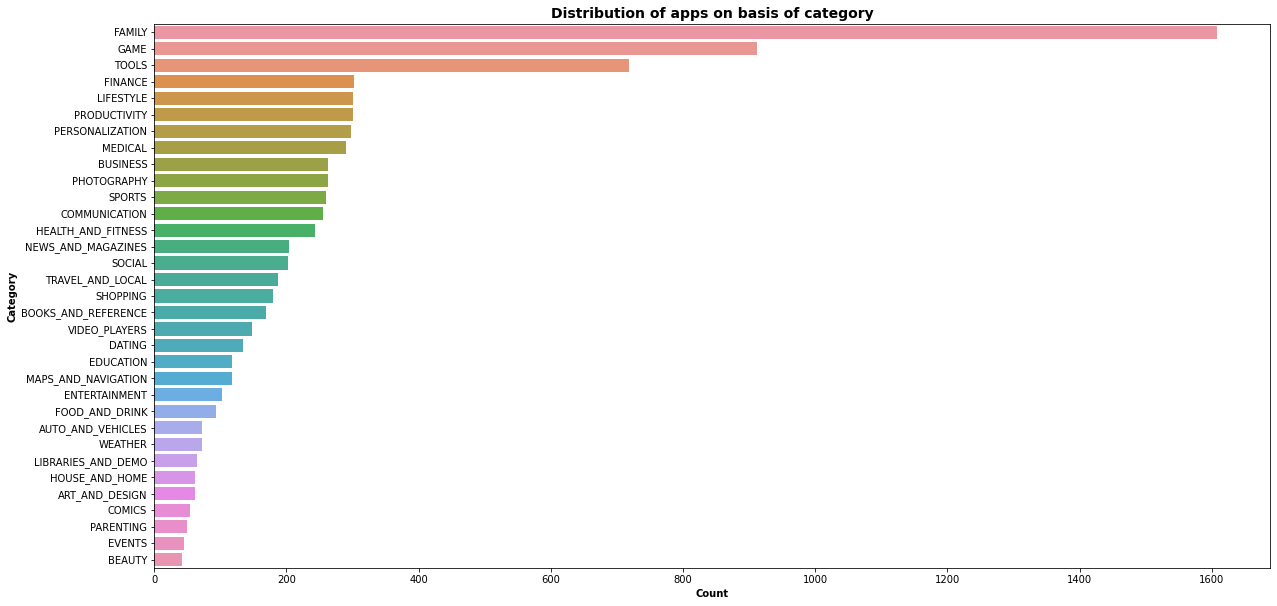

In [27]:
plt.figure(figsize=(20,10))
plt.title("Distribution of apps on basis of category",fontsize=14,weight="bold")
plt.ylabel("Category",fontsize=10,weight='bold')
plt.xlabel("Count",fontsize=10,weight='bold')
sns.barplot(y=categories.index,x=categories.values);

### ILLUSTRATION....

###### FROM THE BAR GRAPH WE CAN SAY THAT MOST OF THE APPS PRSESNT ON PLAY STORE WERE OF CATEGORY FAMILY ,GAMES AND TOOLS.

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

In [29]:
Rating_df=play_store_df.Category[play_store_df.Rating==range(4, 5)].value_counts().head(10)

 ### 3..TOP 10 MOST RATED CATEGORY ON PLAY STORE(4 to 5)

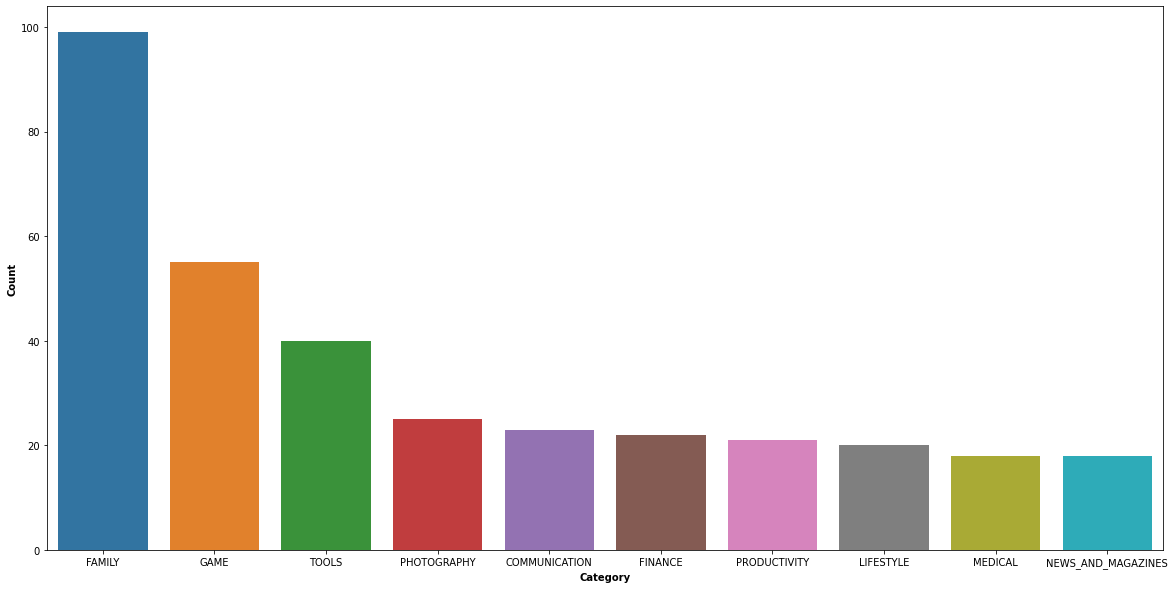

In [30]:
plt.figure(figsize=(20,10))
plt.xlabel("Category",fontsize=10,weight="bold")
plt.ylabel("Count",fontsize=10,weight="bold")
sns.barplot(x=Rating_df.index,y=Rating_df.values);

### ILLUSTRATION....

###### AROUND 100 OF APPS OF FAMILY CATEGORY ARE WELL RATED IN BETWEEN 4 TO 5 AND REST OTHER APPS WERE OF CATEGORY GAME TOOLS ETC .

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

In [32]:
play_store_df.Rating.mean()### THIS IS THE AVERAGE RATING OF APPS ON PLAY STORE

4.173243045387993

In [33]:
avg_rating=play_store_df.groupby("Type")[["Rating"]].mean() ##THIS IS THE AVERAGE RATING OF FREE AND PAID APPS ON PLAY STORE.


### 4..AVERAGE RATING OF APPS ON BASIS OF APP TYPES

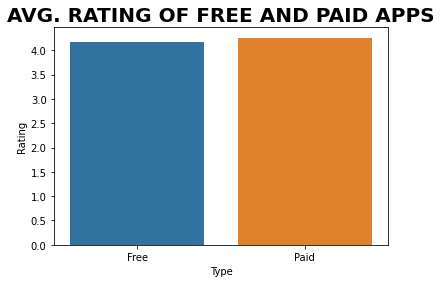

In [34]:
plt.title("AVG. RATING OF FREE AND PAID APPS",fontsize=20,weight="bold")
sns.barplot(x=avg_rating.index,y=avg_rating.Rating);

### ILLUSTRATION...

###### FROM THE ABOVE FIGURE WE CAN UNDERSTOOD THAT THE AVERAGE RATING OF FREE APPS(4.16) IS EVEN LESS THAN THE AVERAGE RATING OF ALL APPS(4.17) PRESENT ON PLAY STORE.

###### AND THE AVERGAE RATING OF PAID APPS(4.25) IS HIGHER THAN THE AVERGAE RATING OF ALL APPS(4.17) PRESENT ON PLAY STORE.

### 5.. NO. OF FREE AND PAID APPS IN EACH CATEGORY

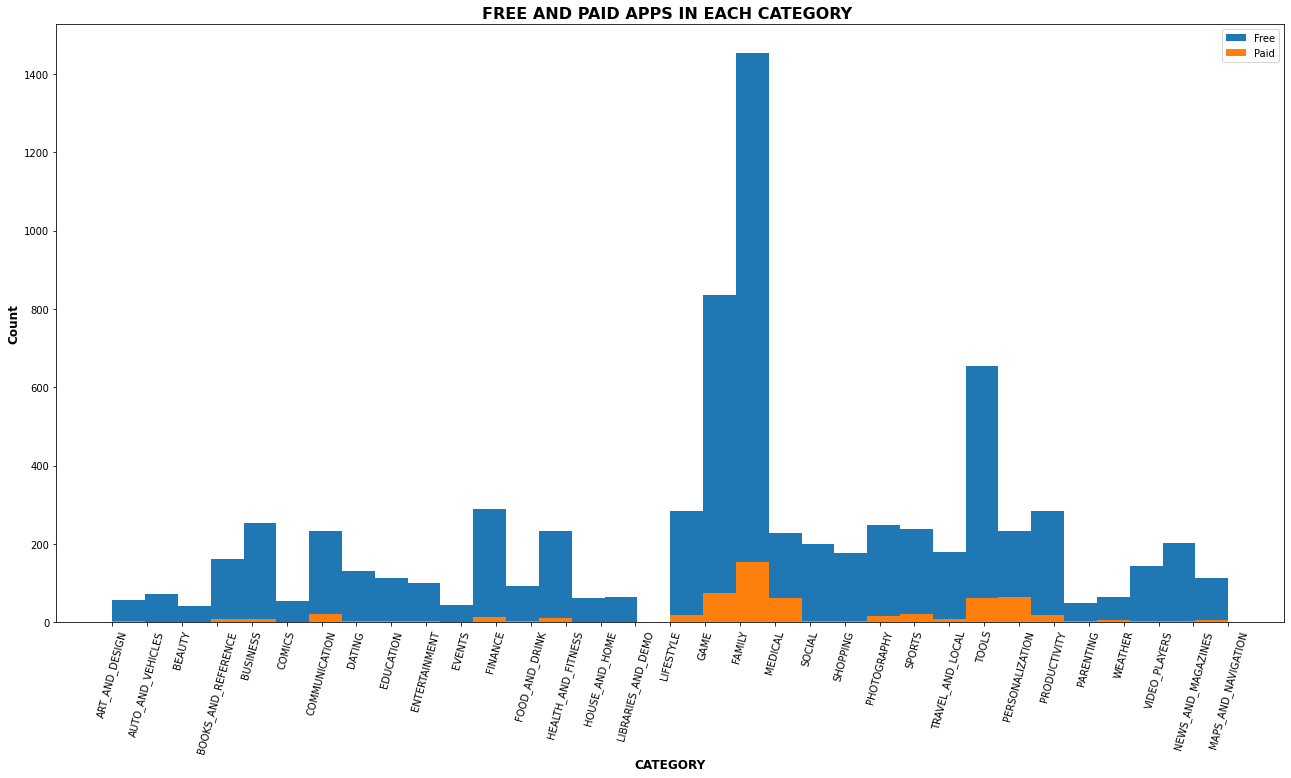

In [35]:
plt.figure(figsize=(22,11))
plt.xticks(rotation=75)
plt.title("FREE AND PAID APPS IN EACH CATEGORY ",fontsize=16,weight="bold")
plt.xlabel("CATEGORY",fontsize=12,weight="bold")
plt.ylabel("Count",fontsize=12,weight="bold")
plt.hist(play_store_df.Category[play_store_df.Type=="Free"],bins=34);
plt.hist(play_store_df.Category[play_store_df.Type=="Paid"],bins=34);
plt.legend(["Free","Paid"]);

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

### 6..TOP 10 AVERAGE RATING OF CATEGORIES

In [37]:
categorised_avg_df=play_store_df.groupby("Category")[["Type","Rating"]].mean()

In [38]:
categorised_avg_df=categorised_avg_df.sort_values("Rating",ascending=False).head(10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


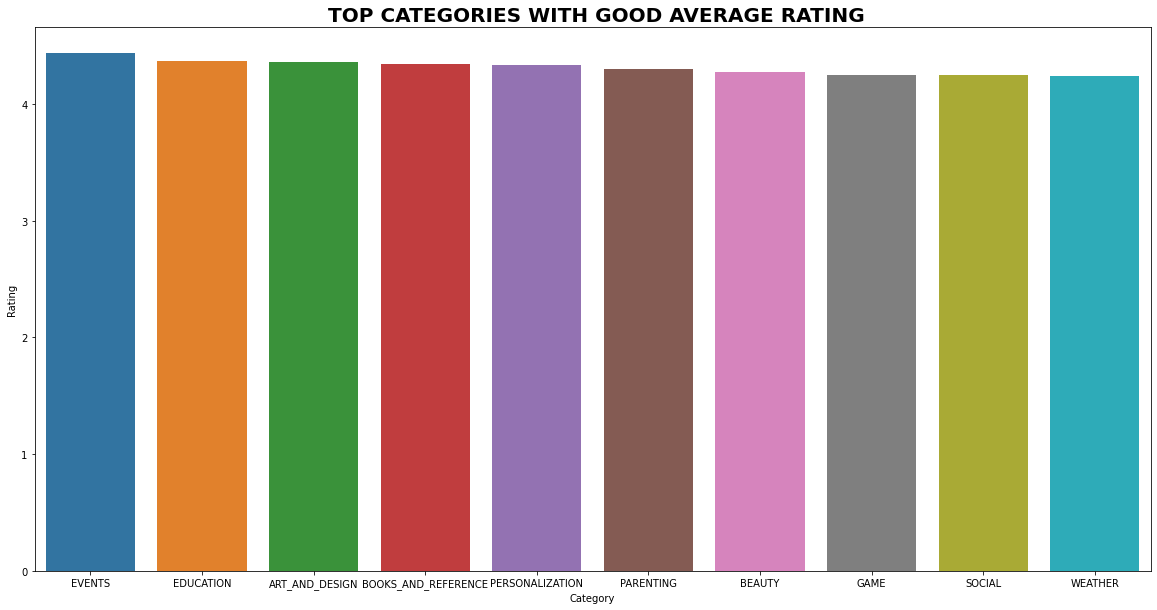

In [39]:
plt.figure(figsize=(20,10))
plt.title(" TOP CATEGORIES WITH GOOD AVERAGE RATING",fontsize=20,weight="bold")
sns.barplot(categorised_avg_df.index,"Rating",data=categorised_avg_df);

### (ILLUSTRATION....)

###### AS WE CAN SEE SEE THE PLOT GRAPH AVERAGE RATING OF EVENTS CATEGORY APPS IS MAX WHILE FAMILY AND GAMES CATEGORY ARE NOT EVEN IN TOP10 OF THIS DATA AND ALSO EDUCATION CATEGORY IS ALSO WELL RATED STANDING ON 2ND POSITION IN DATA.

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

In [41]:
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+


In [42]:
play_store_df=play_store_df.rename(columns={"Content Rating":"Content_rating"})

### 6..DISTRIBUTION OF APPS ON BASIS OF CONTENT TYPE

In [43]:
content_type=play_store_df.Content_rating.value_counts()

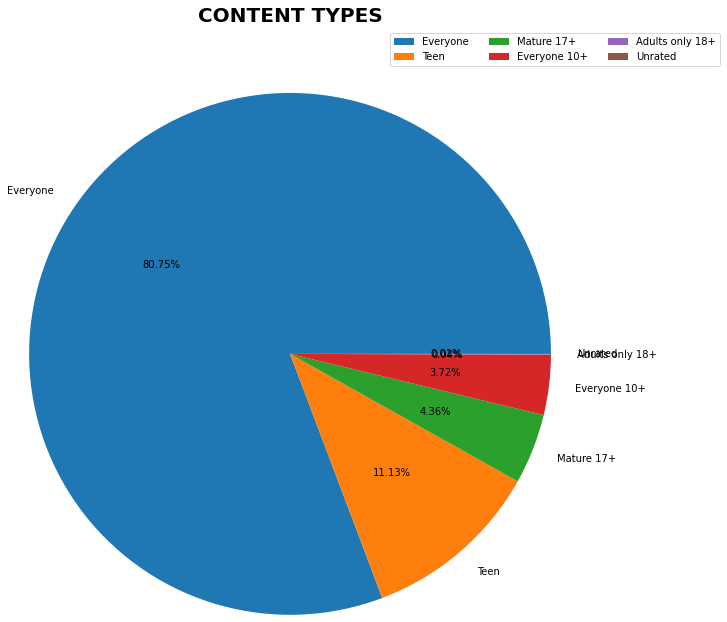

In [44]:
plt.title("CONTENT TYPES",fontsize=20,weight="bold",y=2)
plt.pie(content_type.values,labels=content_type.index,autopct="%1.2f%%",radius=3);
plt.legend(content_type.index,ncol=3,bbox_to_anchor=(2.5,2));

### ILLUSTRATION

###### WELL 80% PERCENT OF THE APPS ON PLAY STORE ARE AVAILABLE FOR EVERYONE

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

## Asking and Answering Questions

##### Q.. Most 5 downloaded apps on play store

In [46]:
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Content_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+


In [49]:
play_store_df.sort_values("Installs",ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Content_rating
3574,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,Everyone
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,Everyone
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,Varies with device,"500,000,000+",Free,Everyone
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,Everyone
3476,Google Calendar,PRODUCTIVITY,4.2,858208,Varies with device,"500,000,000+",Free,Everyone


### ILLUSTRATION..
###### Talking tom ,google cloud print etc are some most downloaded app on play store and also they all even belong to free category.

##### Q..Most 5 paid apps downloaded on play store

In [54]:
play_store_df[play_store_df.Type=="Paid"].sort_values("Installs",ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Content_rating
10036,ADWLauncher 1 EX,PERSONALIZATION,4.3,28728,2.8M,"500,000+",Paid,Everyone
853,Toca Life: City,EDUCATION,4.7,31085,24M,"500,000+",Paid,Everyone
9478,Farming Simulator 16,FAMILY,4.2,32812,14M,"500,000+",Paid,Everyone
9154,NBA JAM by EA SPORTS™,FAMILY,4.3,56444,43M,"500,000+",Paid,Everyone
8449,Cameringo+ Filters Camera,PHOTOGRAPHY,4.6,28107,5.7M,"500,000+",Paid,Everyone


In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'

##  Inferences and Conclusions

#### We have drawn many interesting facts from play store app analysis ,I have drawn some points below..
###### .Most of the apps available on play store are  free of cost 
###### .Family ,Games categorised apps are most available on play store
###### .But paid apps are well rated in compare to free apps,means it is worth to buy paid apps from play store for any purpose because people have rated paid apps very well.
###### .Also 80% of the apps of play store are made to  usuable for  every age categorised  people whether it is child ,teen ,young etc.


## References and Future Work

There is much information we can fetch from the dataset,i have result out some basic information ,so here below are some ideas which we can extract more from the play store app dataset.

.We can extract how does rating of an app effect the no. of download counts of an app.

.How does the new update of an app effect the new rating of the app(whether new update is good or bad on based on users new review and rating).

.Which Category of apps are less downloaded  by the user(Can learn from mistakes done in app) .

### References
play store analysis:https://github.com/qiaochen/DataAnalysis4GooglePlayStore/blob/master/AnalyzeGoogleStoreApp.ipynb

play store app data on kaggle:https://www.kaggle.com/lava18/google-play-store-apps

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html



#### NOTE: The .csv data of play store app is somewhere 1.5 to 2 year old.

In [60]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/play-store-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akashgahlot1926/play-store-analysis


'https://jovian.ml/akashgahlot1926/play-store-analysis'